In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


# Import dataset


In [3]:
USA_Housing = pd.read_csv("USA_Housing.csv")
USA_Housing.head()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
USA_Housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              4990 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     4995 non-null   float64
 3   Avg. Area Number of Bedrooms  4994 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
USA_Housing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,4990.000000,5000.000000,4995.000000,4994.000000,5000.000000,5.000000e+03
mean,68584.719991,5.977222,6.987693,3.981874,36163.516039,1.232073e+06
std,10651.192423,0.991456,1.005938,1.234497,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61481.465105,5.322283,6.299156,3.140000,29403.928700,9.975771e+05
50%,68797.671885,5.970429,7.002940,4.050000,36199.406690,1.232669e+06
75%,75779.145465,6.650808,7.665622,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


# Data Preprocessing

### 1) Missing Value Treatment

In [6]:
USA_Housing.isnull().sum()

Avg. Area Income                10
Avg. Area House Age              0
Avg. Area Number of Rooms        5
Avg. Area Number of Bedrooms     6
Area Population                  0
Price                            0
Address                          0
dtype: int64

### 2) To Decide which Whether impute or drop we need percentage value

In [7]:
USA_Housing.isnull().sum () / len(USA_Housing)*100

Avg. Area Income                0.20
Avg. Area House Age             0.00
Avg. Area Number of Rooms       0.10
Avg. Area Number of Bedrooms    0.12
Area Population                 0.00
Price                           0.00
Address                         0.00
dtype: float64

###  3) Check outliers then decide to go with mean or median for imputation

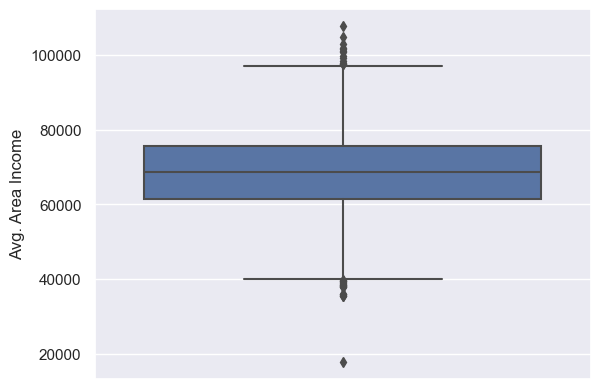

In [8]:
sns.boxplot(y = 'Avg. Area Income', data=USA_Housing)
plt.show()

In [9]:
USA_Housing ["Avg. Area Income"] = USA_Housing ["Avg. Area Income"].fillna(USA_Housing ["Avg. Area Income"].median())

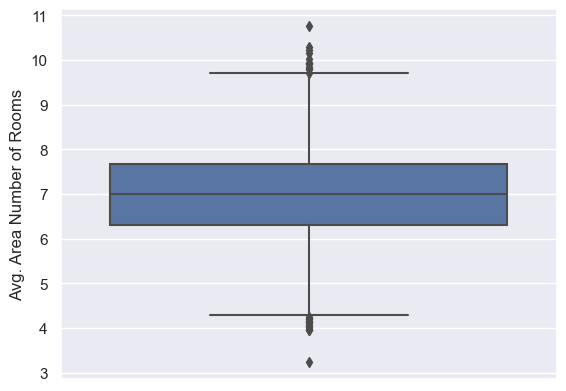

In [10]:
sns.boxplot(y="Avg. Area Number of Rooms", data = USA_Housing )
plt.show()

In [11]:
USA_Housing['Avg. Area Number of Rooms'] = USA_Housing['Avg. Area Number of Rooms'].fillna(USA_Housing['Avg. Area Number of Rooms'].median())

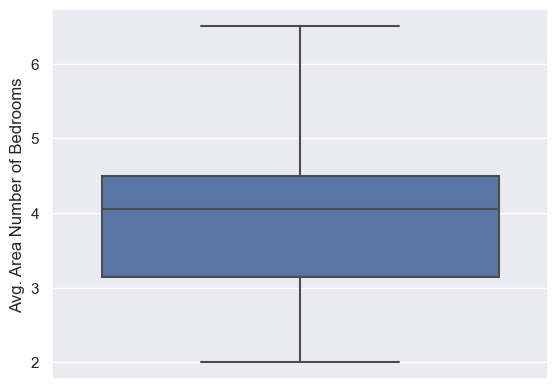

In [12]:
sns.boxplot(y="Avg. Area Number of Bedrooms", data =USA_Housing)
plt.show()

In [13]:
USA_Housing["Avg. Area Number of Bedrooms"] = USA_Housing["Avg. Area Number of Bedrooms"].fillna(USA_Housing["Avg. Area Number of Bedrooms"].median())

In [14]:
USA_Housing.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

###  Encoding 

### There is only one variable for encoding which is address We are going to find that variable is significant or not

In [15]:
USA_Housing['Address'] = USA_Housing['Address'].astype('category')
USA_Housing['Address'] = USA_Housing['Address'].cat.codes

## ANOVA TESTING

In [16]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Price ~ Address', data=USA_Housing).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

                sum_sq      df         F    PR(>F)
Address   4.729103e+10     1.0  0.379215  0.538051
Residual  6.232883e+14  4998.0       NaN       NaN


### Since confidence level is only 47 percent we have to consider address as non significan

In [17]:
USA_Housing = USA_Housing.iloc[:,0:-1]

USA_Housing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


### Handling Outliers

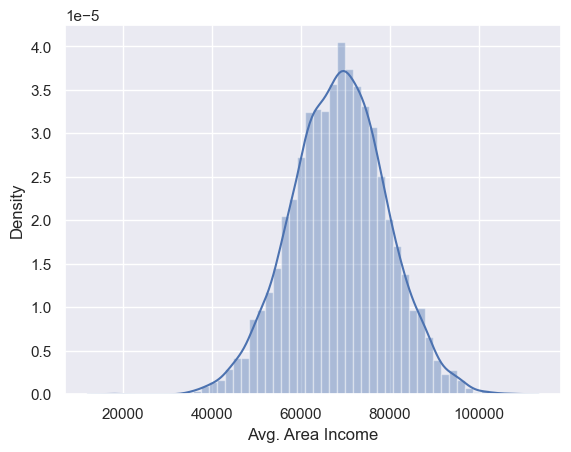

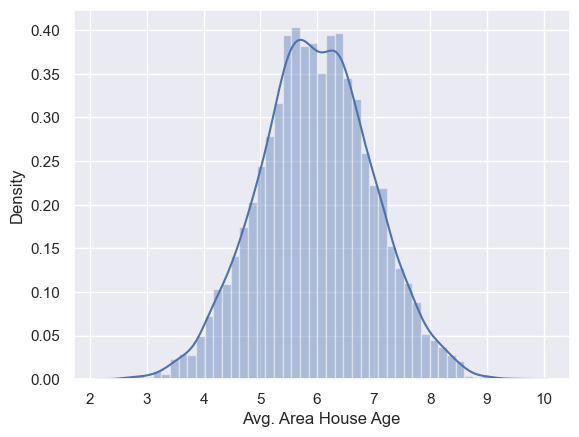

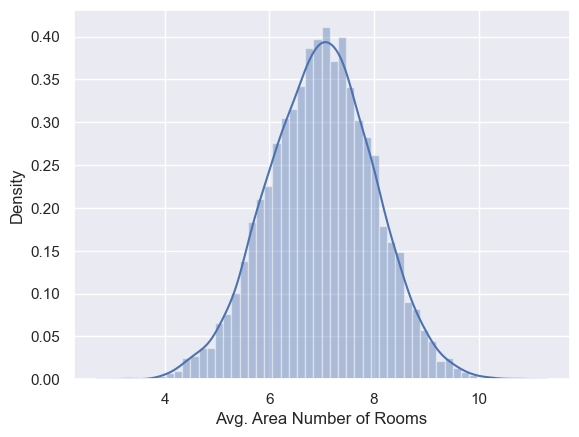

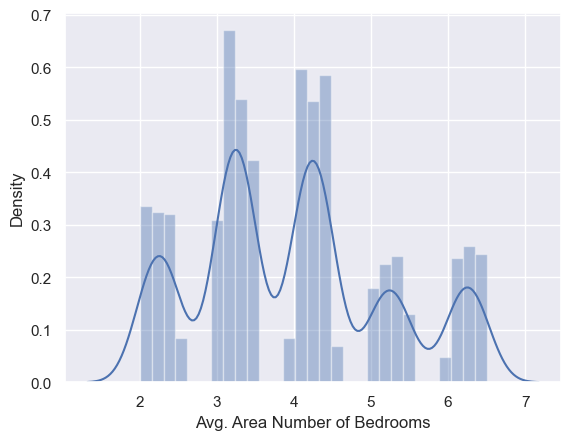

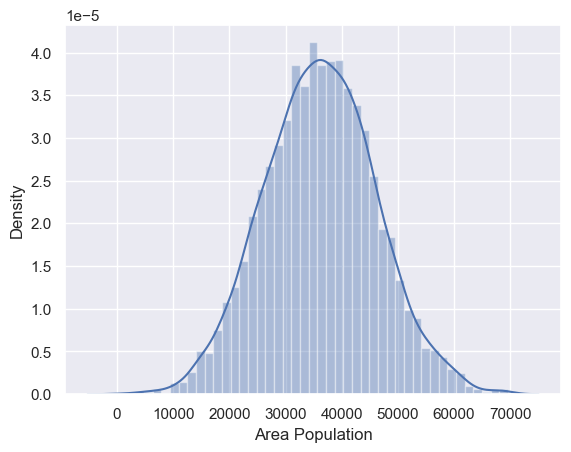

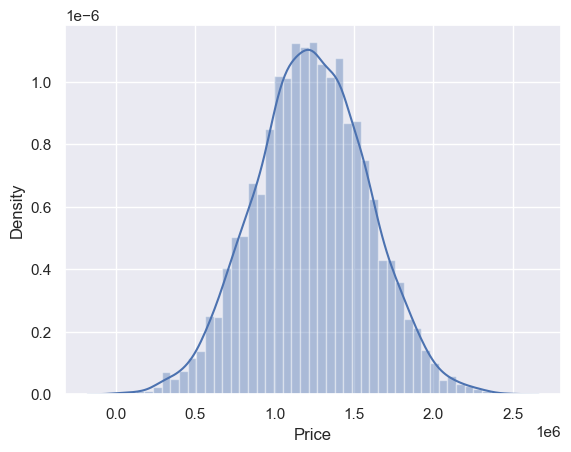

In [18]:
def distplots(col):
    sns.distplot(USA_Housing[col])
    plt.show()
    
for i in list(USA_Housing.columns)[0:]:
    distplots(i)

In [19]:
income_q1 = USA_Housing['Avg. Area Income'].quantile(0.25)
income_q3 = USA_Housing['Avg. Area Income'].quantile(0.75)
income_iqr = income_q3 -  income_q1
income_upper = income_q3 + 1.5 * income_iqr
income_lower = income_q1 - 1.5 * income_iqr

In [20]:
USA_Housing['Avg. Area Income'] = np.where(USA_Housing['Avg. Area Income'] > income_upper, income_upper,
                                     np.where(USA_Housing['Avg. Area Income'] < income_lower, income_lower,
                                            USA_Housing['Avg. Area Income']) )

In [21]:
age_q1 = USA_Housing['Avg. Area House Age'].quantile(0.25)
age_q3 = USA_Housing['Avg. Area House Age'].quantile(0.75)
age_iqr = age_q3 - age_q1
age_upper = age_q3 + 1.5 * age_iqr
age_lower = age_q1 - 1.5 * age_iqr

In [22]:
USA_Housing['Avg. Area House Age'] = np.where(USA_Housing['Avg. Area House Age'] > age_upper,age_upper,
                                     np.where(USA_Housing['Avg. Area House Age'] < age_lower, age_lower,
                                            USA_Housing['Avg. Area House Age']) )

In [23]:
room_q1 = USA_Housing['Avg. Area Number of Rooms'].quantile(0.25)
room_q3 = USA_Housing['Avg. Area Number of Rooms'].quantile(0.75)
room_iqr = room_q3 - room_q1
room_upper = room_q3 + 1.5 * room_iqr
room_lower = room_q1 - 1.5 * room_iqr

In [24]:
USA_Housing['Avg. Area Number of Rooms'] = np.where(USA_Housing['Avg. Area Number of Rooms'] > room_upper,room_upper,
                                     np.where(USA_Housing['Avg. Area Number of Rooms'] < room_lower, room_lower,
                                            USA_Housing['Avg. Area Number of Rooms']) )

In [25]:
pop_q1 = USA_Housing['Area Population'].quantile(0.25)
pop_q3 = USA_Housing['Area Population'].quantile(0.75)
pop_iqr = pop_q3 - pop_q1
pop_upper = pop_q3 + 1.5 * pop_iqr
pop_lower = pop_q1 - 1.5 * pop_iqr

In [26]:
USA_Housing['Area Population'] = np.where(USA_Housing['Area Population'] > pop_upper,pop_upper,
                                     np.where(USA_Housing['Area Population'] < pop_lower, pop_lower,
                                            USA_Housing['Area Population']) )

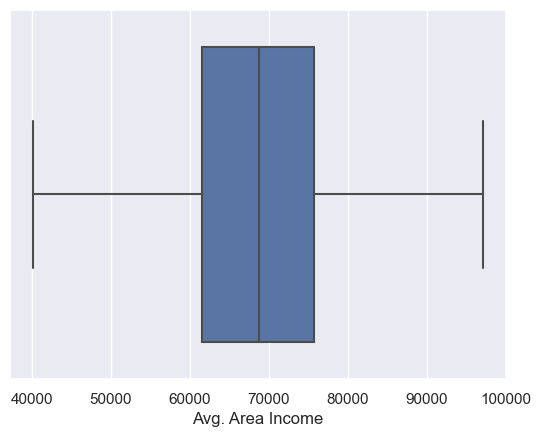

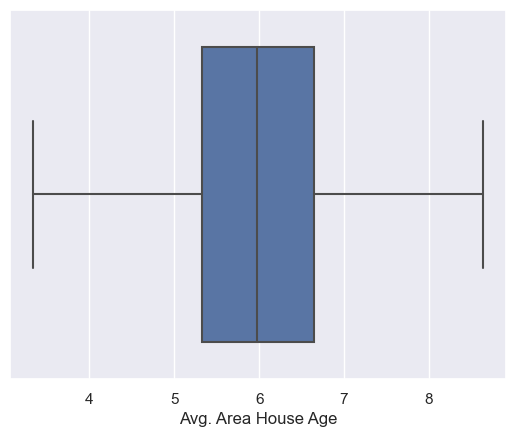

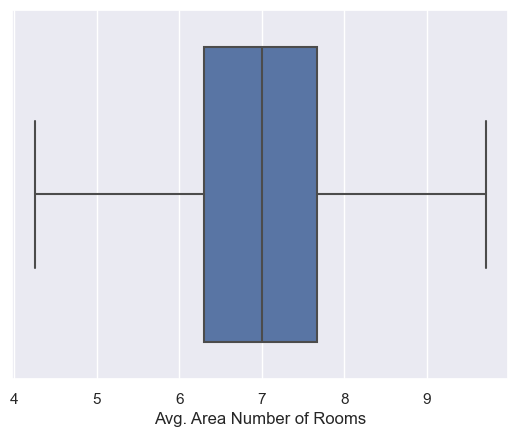

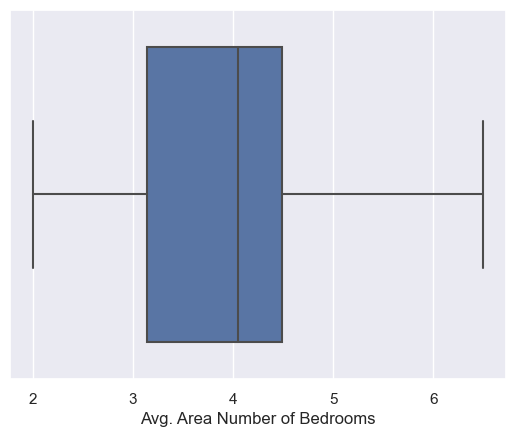

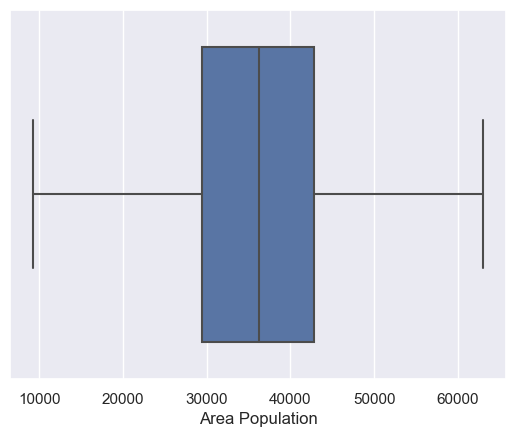

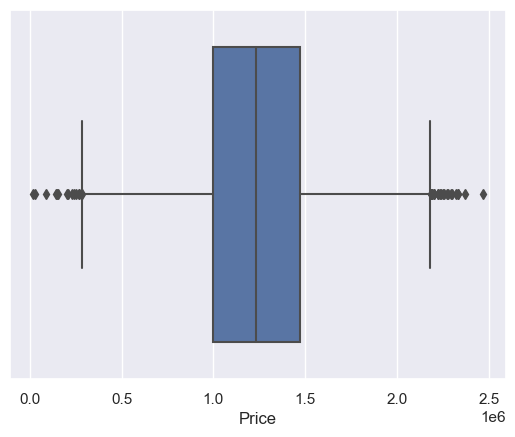

In [27]:
def boxplots(col):
    sns.boxplot(USA_Housing[col])
    plt.show()
    
for i in list(USA_Housing.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)

### As you can We handled outliers very well except on the price because it is a dependendant variable

## Feature Scaling

In [28]:
x = USA_Housing.iloc[:,0:-1]
y = USA_Housing["Price"]

In [29]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [30]:
x.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.45857,5.682861,7.009188,4.09,23086.80050
1,79248.64245,6.002900,6.730821,3.09,40173.07217
2,61287.06718,5.865890,8.512727,5.13,36882.15940
3,63345.24005,7.188236,5.586729,3.26,34310.24283
4,59982.19723,5.040555,7.839388,4.23,26354.10947


In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_x = sc.fit_transform(x)
pd.DataFrame(sc_x)

,0,1,2,3,4
0,1.036382,-0.298541,0.021620,0.087582,-1.325622
1,1.008309,0.025747,-0.256381,-0.723031,0.407049
2,-0.690457,-0.113082,1.523179,0.930619,0.073326
3,-0.495800,1.226822,-1.398967,-0.585227,-0.187484
4,-0.813869,-0.949376,0.850726,0.201068,-0.994293
...,...,...,...,...,...
4995,-0.758470,1.877474,-0.849064,-0.423104,-1.350917
4996,0.936679,1.035210,-0.410236,0.030839,-1.069131
4997,-0.491501,1.290004,-2.179585,-1.501219,-0.293363
4998,-0.055437,-0.448985,0.142416,1.181909,0.655755


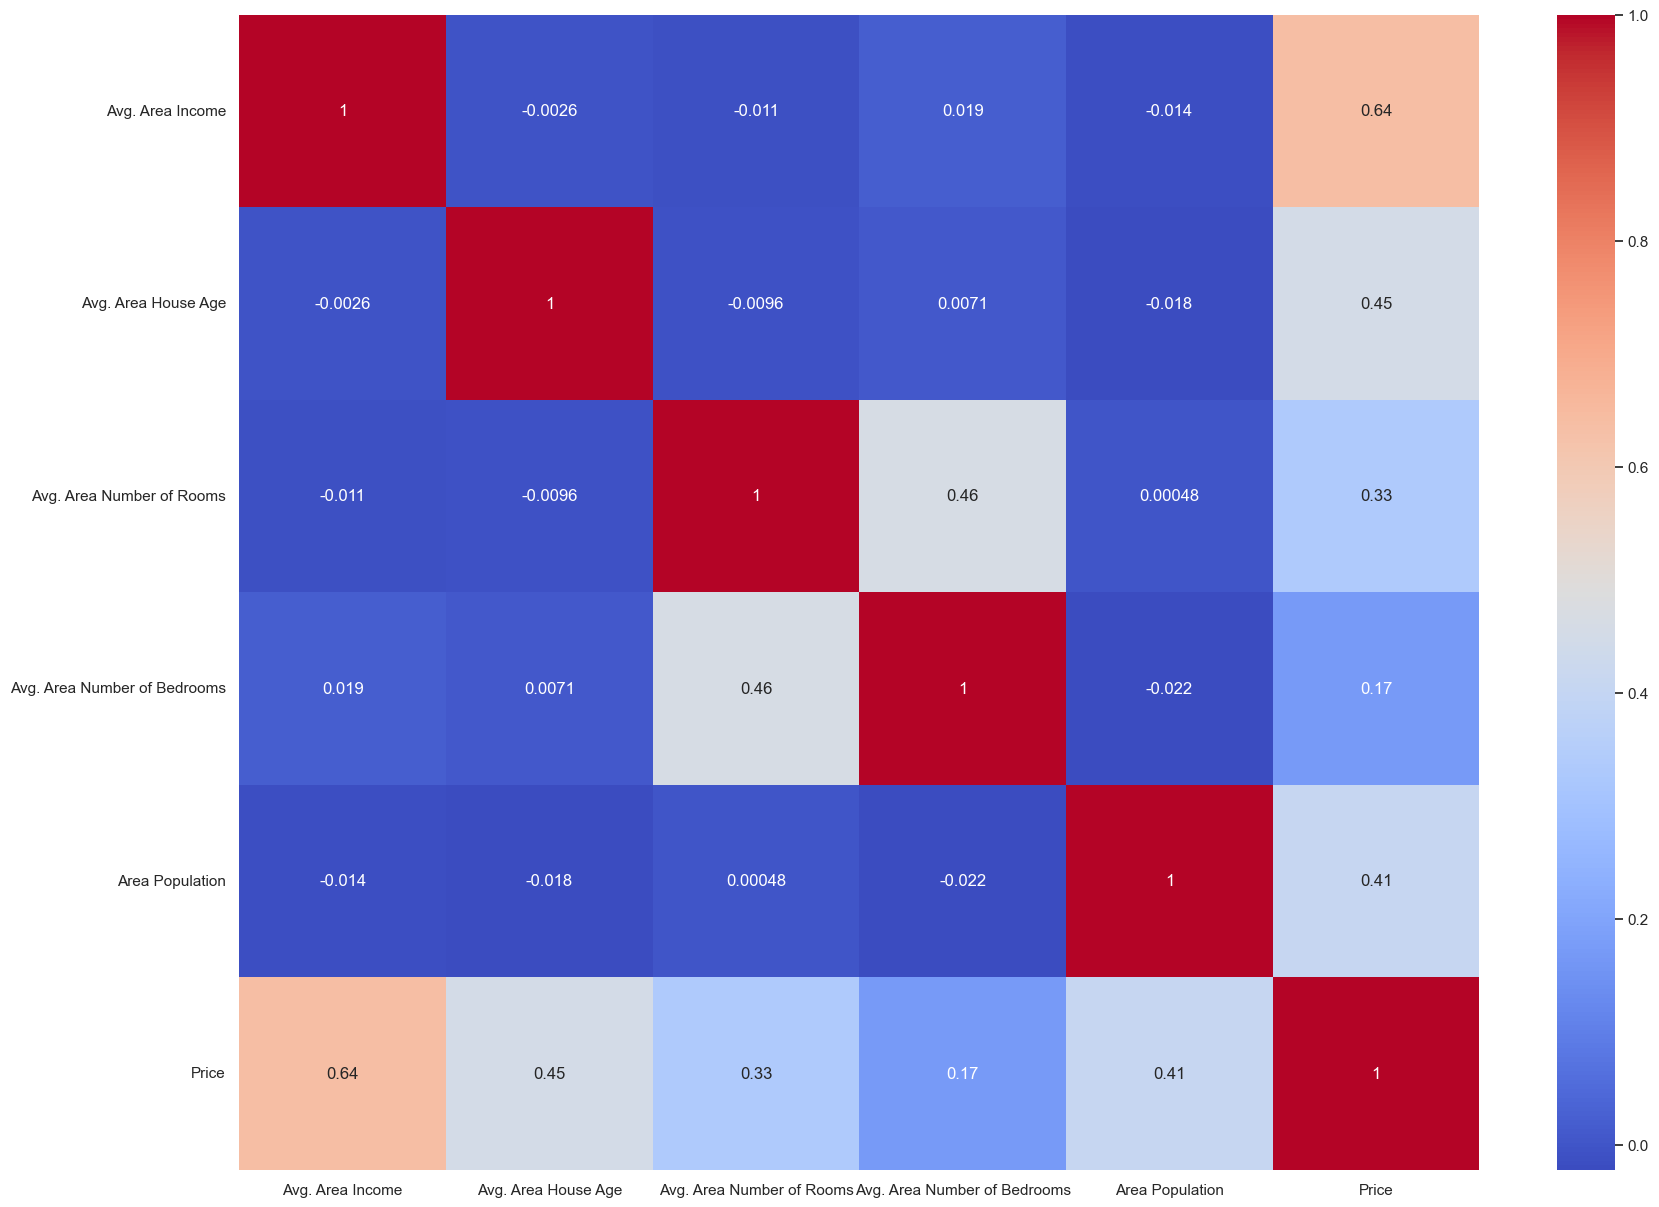

In [32]:
# Finding correlation
plt.figure(figsize=(20,15))
corr = USA_Housing.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

## VIF - Variance Inflation Factor - to check multicollinearity

In [33]:
variable = sc_x
variable.shape

(5000, 5)

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = sc_x

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable, i ) for i in range(variable.shape[1])]

vif['Features'] = x.columns

In [35]:
vif

,Variance Inflation Factor,Features
0,1.001067,Avg. Area Income
1,1.000593,Avg. Area House Age
2,1.274864,Avg. Area Number of Rooms
3,1.275727,Avg. Area Number of Bedrooms
4,1.001144,Area Population


###  Split the data into training and test for building the model and for prediction

In [39]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3750, 5) (1250, 5) (3750,) (1250,)


## OLS Method

In [38]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [40]:
reg_model = smf.OLS(endog = y_train, exog=x_train).fit()

In [41]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                          2.011e+04
Date:                Thu, 15 Feb 2024   Prob (F-statistic):                        0.00
Time:                        21:40:37   Log-Likelihood:                         -51812.
No. Observations:                3750   AIC:                                  1.036e+05
Df Residuals:                    3745   BIC:                                  1.037e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Avg. Area Income                10.2091      0.314     32.560      0.000       9.594      10.824
Avg. Area House Age           4.916e+04   3478.628     14.131      0.000    4.23e+04     5.6e+04
Avg. Area Number of Rooms     -1.09e+04   3801.792     -2.868      0.004   -1.84e+04   -3448.582
Avg. Area Number of Bedrooms  5109.5344   3631.219      1.407      0.159   -2009.825    1.22e+04
Area Population                  8.5764      0.382     22.429      0.000       7.827       9.326
==============================================================================
Omnibus:                        0.212   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.899   Jarque-Bera (JB):                0.258
Skew:                          -0.000   Prob(JB):                        0.879
Kurtosis:                       2.959   Cond. No.                     9.32e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""